In [243]:
import matplotlib.pyplot as plt
import numpy as np

## Model Definition

In [247]:
# This class is similar to what Ethereum homestead does with QRL parameterization for 60s 
class AdaptiveControl:
    def __init__(self, fa=10, fb=60, fc=-99, fd=16):
        self.fa = fa
        self.fb = fb
        self.fc = fc
        self.fd = fd

    def calcDifficulty(self, timestamp_delta, prev_difficulty):
        adj_factor = max( self.fa - self.fa*timestamp_delta / self.fb, self.fc)
        difficulty = prev_difficulty + (prev_difficulty*adj_factor)/self.fd
        return difficulty

class SystemResponse:
    def __init__(self):
        pass
    
    def getHashPower(self, block_idx):
        if block_idx<20:
            return 250

        if block_idx<40:
            return 1000

        if block_idx<60:
            return 500
       
        return 250
    
    def calcSolutionTime(self, difficulty, block_idx):
        hash_power = self.getHashPower(block_idx)
        return difficulty / hash_power*2
        

## Create Model

In [248]:
ac = AdaptiveControl()
miner = SystemResponse()

## Run Model

In [249]:
difficulty = 5000

historic_difficulty = []
historic_delta = []
historic_hashpower = []

for block_idx in range(100):
    timestamp_delta = miner.calcSolutionTime(difficulty, block_idx)

    historic_hashpower.append(miner.getHashPower(block_idx))
    historic_difficulty.append(difficulty)
    historic_delta.append(timestamp_delta)
    
    difficulty = ac.calcDifficulty(timestamp_delta = timestamp_delta, prev_difficulty = difficulty)
    

## Plots

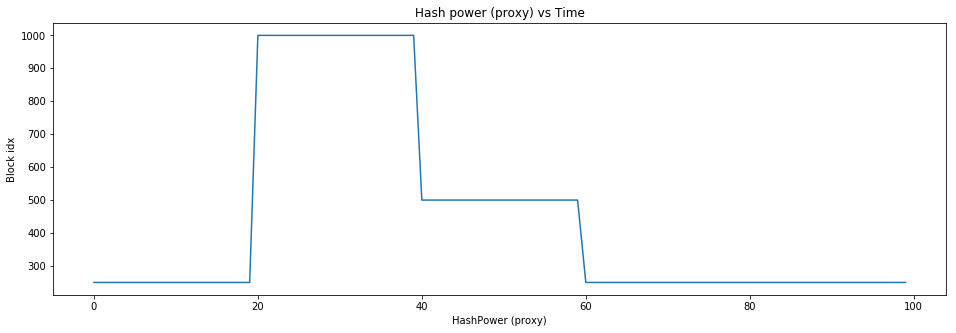

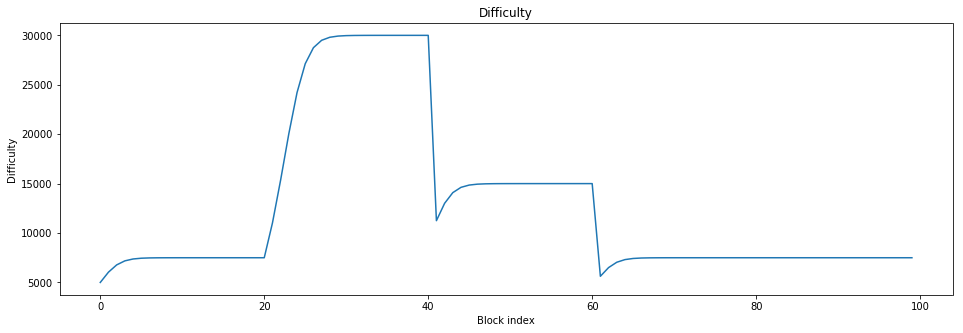

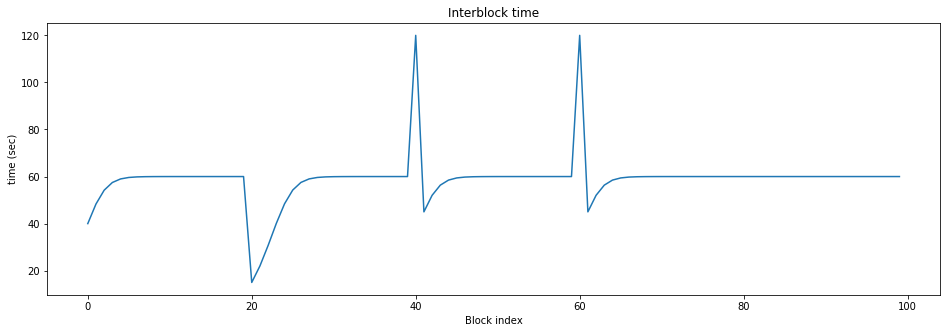

In [250]:
plt.figure(figsize=(16,5))
plt.plot(historic_hashpower)
plt.title("Hash power (proxy) vs Time")
plt.xlabel("HashPower (proxy)")
plt.ylabel("Block idx")
plt.show()

# Plot Time vs Difficulty
plt.figure(figsize=(16,5))
plt.plot(historic_difficulty)
plt.title("Difficulty")
plt.ylabel("Difficulty")
plt.xlabel("Block index")
plt.show()

plt.figure(figsize=(16,5))
plt.plot(historic_delta)
plt.title("Interblock time")
plt.ylabel("time (sec)")
plt.xlabel("Block index")

plt.show()
